In [1]:
#Atividade da Aula 2
#Tópicos em IC
#Débora Liliane Oliveira Borges

import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
import pandas

diabetes = load_diabetes()

print(diabetes.DESCR)

tabela = pandas.DataFrame(diabetes.data)
tabela.columns = diabetes.feature_names
tabela.head()



.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [90]:
#VARIAVEL A SER PREDITA
tabela['y'] = diabetes.target
tabela.head(15)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [91]:
#Calculo por sexo
X1 = tabela['sex']
#PEGANDO PARA TREINAMENTO TODOS OS DADOS EXECETO OS 20 ULTIMOS
X1_treinamento = X1[:-20].array.to_numpy().reshape(-1,1)
X1_teste = X1[-20:].array.to_numpy().reshape(-1,1)

#PROGRESSAO DA DOENCA DEPOIS DE UM ANO DE MEDICAO
y1 = tabela['y']
y1_treinamento = y1[:-20]
y1_teste = y1[-20:].array.to_numpy().reshape(-1,1)


regr = linear_model.LinearRegression()

regr.fit(X1_treinamento, y1_treinamento)

#coeficientes b1
print('Coeficiente b1: \n', regr.coef_)
#intercepto
print('Coeficiente b0: \n', regr.intercept_)

Coeficiente b1: 
 [59.78480979]
Coeficiente b0: 
 153.37111396947168


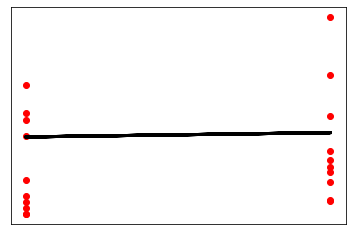

In [92]:
# Predição
#ultimos 20 pacientes
diabetes_y_pred1 = regr.predict(X1_teste)

plt.scatter(X1_teste,y1_teste,  color='red')
plt.plot(X1_teste, diabetes_y_pred1, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [93]:
#Calculando o erro médio
print('Erro médio (sexo): ', sum(abs(y1_teste-diabetes_y_pred1.reshape(-1,1))))

Erro médio (sexo):  [1301.00850536]


In [94]:
#ERRO MÉDIO QUADRATICO
print('ERRO MÉDIO QUADRATICO' ,mean_squared_error(y1_teste, diabetes_y_pred1.reshape(-1,1)))


ERRO MÉDIO QUADRATICO 5501.908212234339


In [95]:
#Calculo por pressão arterial média bp
X2 = tabela['bp']
#PEGANDO PARA TREINAMENTO TODOS OS DADOS EXECETO OS 20 ULTIMOS
X2_treinamento = X2[:-20].array.to_numpy().reshape(-1,1)
X2_teste = X2[-20:].array.to_numpy().reshape(-1,1)

#PROGRESSAO DA DOENCA DEPOIS DE UM ANO DE MEDICAO
y2 = tabela['y']
y2_treinamento = y2[:-20]
y2_teste = y2[-20:].array.to_numpy().reshape(-1,1)


regr = linear_model.LinearRegression()

regr.fit(X2_treinamento, y2_treinamento)

#coeficientes b1
print('Coeficiente b1: \n', regr.coef_)
#intercepto b0
print('Coeficiente b0: \n', regr.intercept_)


Coeficiente b1: 
 [709.19471785]
Coeficiente b0: 
 153.13724802041313


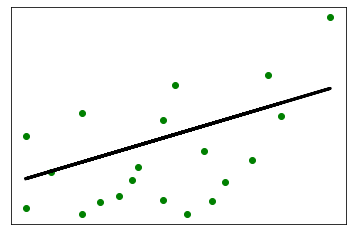

In [99]:
# Predição bp
diabetes_y_pred2 = regr.predict(X2_teste)

plt.scatter(X2_teste,y2_teste,  color='green')
plt.plot(X2_teste, diabetes_y_pred2, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [100]:
#Calculando o erro médio
print('Erro médio (pressão arterial:) ', sum(abs(y2_teste-diabetes_y_pred2.reshape(-1,1))))

Erro médio (pressão arterial:)  [1142.55880778]


In [101]:
#ERRO MÉDIO QUADRATICO
print('ERRO MÉDIO QUADRATICO' ,mean_squared_error(y2_teste, diabetes_y_pred2.reshape(-1,1)))


ERRO MÉDIO QUADRATICO 4058.4102891387315


In [103]:
X3 = tabela [['sex', 'bp']]

print(X3)



          sex        bp
0    0.050680  0.021872
1   -0.044642 -0.026328
2    0.050680 -0.005671
3   -0.044642 -0.036656
4   -0.044642  0.021872
..        ...       ...
437  0.050680  0.059744
438  0.050680 -0.067642
439  0.050680  0.017282
440 -0.044642  0.001215
441 -0.044642 -0.081414

[442 rows x 2 columns]


Coeficientes: 
 [-104.64733631  732.64120655]
Coeficientes: 
 153.114824872756


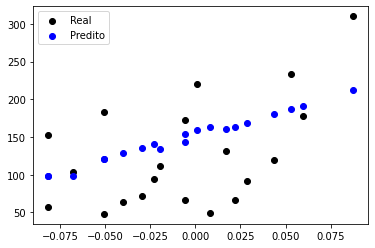

In [130]:
X3 = tabela[["sex", "bp"]]
X3_treinamento = X3[:-20]
X3_teste = X3[-20:]

y3_treinamento = tabela["y"][:-20]
y3_teste = tabela["y"][-20:]

regr = linear_model.LinearRegression()

regr.fit(X3_treinamento, y3_treinamento)

y_pred = regr.predict(X3_teste)

print('Coeficientes: \n', regr.coef_)
print('Coeficientes: \n', regr.intercept_)



#plota todos os valores de validação
plt.scatter(X3_teste["bp"], y3_teste,  color='black')
plt.scatter(X3_teste["bp"], y_pred, color='blue')
plt.legend(["Real", "Predito"])

In [131]:
#Calculando o erro médio quadratico
print('Erro médio: ', sum((y3_teste-y_pred)**2)/len(y3_teste))



Erro médio:  3997.485798735851
